## Ruby - Simple Linear Regression - Demo
---

Install openblas library. For Mac, install using Homebrew if not already installed:

```$> brew install openblas```



In [1]:
require 'rover-df'
require 'rumale'
require 'numo/gnuplot'

require 'numo/linalg/linalg'
Numo::Linalg::Loader.load_openblas '/usr/local/opt/openblas/lib'
nil

Import Dataset

In [2]:
df = Rover.read_csv('salary_data.csv')

YearsExperience  Salary
            1.1   39343
            1.3   46205
            1.5   37731
            2.0   43525
            2.2   39891
            ...     ...
            9.0  105582
            9.5  116969
            9.6  112635
           10.3  122391
           10.5  121872

Convert dataset to Numo::NArray dataset

In [3]:
data = df.to_numo
x = data[true, 0].expand_dims(1)
y = data[true, 1]; nil

Split dataset into Training and Test set

In [4]:
x_train, x_test, y_train, y_test = Rumale::ModelSelection.train_test_split(
  x, y, test_size: 0.3, random_seed: 1
); nil

Fit traning set data and predict test set results

In [5]:
# fit
model = Rumale::LinearModel::LinearRegression.new(solver: 'svd')
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test); nil

Visualize training set results

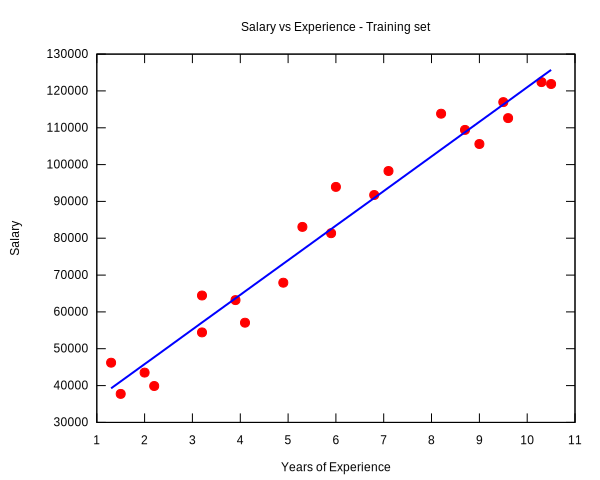

In [6]:
Numo.noteplot do
  set title: 'Salary vs Experience - Training set'
  set xlabel: 'Years of Experience'
  set ylabel: 'Salary'
  plot [x_train, y_train, notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
       [x_train, model.predict(x_train), notitle: true, w:'lines', lt: { rgb: 'blue', lw: 2 }]
end